<a href="https://colab.research.google.com/github/ghrbarbosa/Covid-19-Brazil/blob/main/Covid_19_Brazil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# How serious is Covid-19 in Brazil

COVID-19 is a virus disease that has been present in billions of lives around the world during the last feel years. Maybe affecting directly or indirectly the lives of all of us.

The contamination process goes through small particles of saliva expelled during a cough or sneeze of a contaminated person. And the symptoms are completely different through person to person, and we've been fully explained of all of this these years.

<center><img alt="covid logo" width="70%" src="https://cdnuploads.aa.com.tr/uploads/Contents/2020/07/27/thumbs_b_c_00812766a1081a4749b7ad22bc1deebc.jpg?v=090348"></center>


Until this moment, we know that 30% of the cases are quick and asymptomatic, and the biggest part of these cases people get better without any sequels (accordingly to Centers of Disease Control and Prevention in April 2021 [-link here-]('https://www.cdc.gov/coronavirus/2019-ncov/hcp/planning-scenarios.html')).

Although, a part of people contaminated with the virus unfortunately will have serious infections (probably lungs), demanding intensive hospital treatments: be oxygen cylinders or even mechanical respirators.

Being one of the worst countries in the last few months when it comes to Covid-19, Brazil experienced how a bad public administration of health and disoriented public policies can be dangerous, specially when we're dealing with millions of lives. That's why we're talking about this country.

## Data Source

The **Our World in Data** (OWID) is an institution focused in solving the worst problems in humanity, specially if it's possible to solve part of it with information. And that's when OWID comes maintaining Covid-19's dataset, been updated daily and includes data on confirmed cases, deaths, hospitalizations, testing, and vaccinations as well as other variables of potential interest.

One of the problems when we decide to do some research about social problems, whatever it be, is that the data might be manipulated by public institutions or authorities to pass the false sensation of "control". That's why iniciatives like OWID are crucial to keep information safe in these troubled years.

### Variables dictionary

* The database that we're going to use counts on 59 variables of either identification or information. We can find total of deaths, total of cases, new cases, some pre-analysis (be the normalized numbers or the tax by 1 million people), etc. It's a very complete database, and it's worth to take a look on it.
    * *The complete description of each variable can be found [here](https://github.com/owid/covid-19-data/blob/master/public/data/owid-covid-codebook.csv).*

### Importing the COVID-19 data

* Here it's our first contact with the dataset and with the libraries we're going to use:

In [2]:
# importing the libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style()
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# importing the dataset

df = pd.read_csv('https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv')


## Exploratory Data Analysis (EDA)

Our fundamental analysis will consist in two different parts. The first one will be the basic statistics of our dataset, the appearance, size, general information about all the countries.

The second part will be figuring out if the data can show us why the situation in Brazil is problematic, and if we should worry about it.

### Initial EDA

In this part of the progress we're just knowing how our dataset looks like:

* *Visualizing the first 5 rows:*

    * `df.head()`


In [ ]:
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,0.026,0.026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511


* *Now we're going to create a new database just with the information of the countries itself, by cleaning the rows with missing values (it's going to be useful later):*

    * `df.dropna()`


In [51]:
df_countries = df.dropna(subset=['continent'])

df_countries.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,0.026,0.026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511


* *What's the size of our dataframe?*
    * `df.shape`


In [ ]:
print('Size of our table'
      '\nNumber of rows:   ', df.shape[0],
      '\nNumber of columns:   ', df.shape[1])

Size of our table
Number of rows:    82837 
Number of columns:    59


* *Let's print the names of the columns*
    * `df.columns`

In [ ]:
df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'new_vaccinations',
       'new_vaccinations_smoothed', 'total_vaccinations_per_hun

* *Identifying the percentage of missing values in our database:*

    * `(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)`

In [ ]:
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

weekly_icu_admissions                    0.991175
weekly_icu_admissions_per_million        0.991175
weekly_hosp_admissions                   0.984838
weekly_hosp_admissions_per_million       0.984838
people_fully_vaccinated                  0.935331
people_fully_vaccinated_per_hundred      0.935331
new_vaccinations                         0.917428
people_vaccinated                        0.910487
people_vaccinated_per_hundred            0.910487
total_vaccinations                       0.902519
total_vaccinations_per_hundred           0.902519
icu_patients_per_million                 0.895904
icu_patients                             0.895904
hosp_patients                            0.874488
hosp_patients_per_million                0.874488
new_vaccinations_smoothed_per_million    0.841436
new_vaccinations_smoothed                0.841436
total_tests                              0.545855
total_tests_per_thousand                 0.545855
new_tests_per_thousand                   0.542487


We can see that the informations of the upper variables are completely scarse, making difficult to use it in an efficient analysis. *That's why it's important to study the variables before using them.*

* *The types of the variables*

    * `df.dtypes`


In [ ]:
df.dtypes

iso_code                                  object
continent                                 object
location                                  object
date                                      object
total_cases                              float64
new_cases                                float64
new_cases_smoothed                       float64
total_deaths                             float64
new_deaths                               float64
new_deaths_smoothed                      float64
total_cases_per_million                  float64
new_cases_per_million                    float64
new_cases_smoothed_per_million           float64
total_deaths_per_million                 float64
new_deaths_per_million                   float64
new_deaths_smoothed_per_million          float64
reproduction_rate                        float64
icu_patients                             float64
icu_patients_per_million                 float64
hosp_patients                            float64
hosp_patients_per_mi

* *Converting the column `date` into `datetime`*

    * `df.date = pd.to_datetime(df.date)`


In [ ]:
df.date = pd.to_datetime(df.date)

* Now we're starting to get some information. Let's see what the world looks like today, April 19th, by the smoothed (avarage) new deaths values.
  * `df_countries.loc[df.date == '2021-04-19', ['location', 'new_deaths_smoothed']].sort_values(by="new_deaths_smoothed", ascending=False)[0:10]`


In [54]:
df_countries.loc[df.date == '2021-04-19', ['location', 'new_deaths_smoothed']].sort_values(by="new_deaths_smoothed", ascending=False)[0:10]

,location,new_deaths_smoothed
11043,Brazil,2866.429
34557,India,1353.143
79123,United States,714.000
60246,Poland,521.714
48681,Mexico,394.857
77774,Ukraine,391.857
37639,Italy,375.857
61949,Russia,374.429
16567,Colombia,370.286
35838,Iran,338.000


* **Now we can see why we should be concerned about Brazil.** Now let's project a chart:


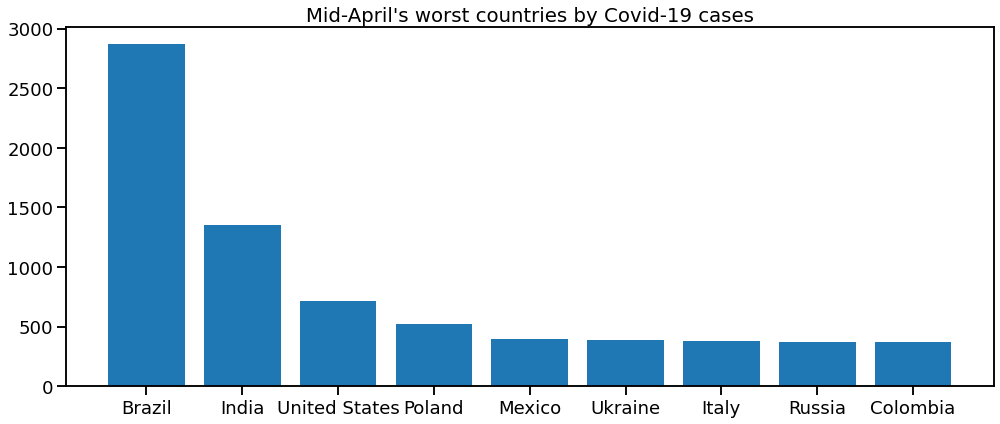

In [ ]:
top_10 = df_countries.loc[df.date == '2021-04-19', ['location', 'new_deaths_smoothed']].sort_values(by="new_deaths_smoothed", ascending=False)[0:9]

fig, ax = plt.subplots(figsize=(14,6))

ax.bar('location', 'new_deaths_smoothed', data=top_10)

plt.title("Mid-April's worst countries by Covid-19 cases")

plt.tight_layout()

plt.show()

### Exploratory Data Analysis of Brazil

So, now we're going to dig more information about Brazil.





* We're copying the original dataframe just with Brazil
    * `df_brazil = df.loc[df.location == "Brazil"].copy()`

In [16]:
df_brazil = df.loc[df.location == "Brazil"].copy()

df_brazil.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
10625,BRA,South America,Brazil,2020-02-26,1.0,1.0,NaN,NaN,NaN,NaN,0.005,0.005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765
10626,BRA,South America,Brazil,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,0.005,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765
10627,BRA,South America,Brazil,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.005,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765
10628,BRA,South America,Brazil,2020-02-29,2.0,1.0,NaN,NaN,NaN,NaN,0.009,0.005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765
10629,BRA,South America,Brazil,2020-03-01,2.0,0.0,NaN,NaN,NaN,NaN,0.009,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765


* Identify when was the first death of Brazil

In [18]:
df_brazil.loc[df_brazil['new_deaths'] == 1.0].head(1)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
10645,BRA,South America,Brazil,2020-03-17,321.0,121.0,41.429,1.0,1.0,0.143,1.51,0.569,0.195,0.005,0.005,0.001,2.65,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,57.87,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765


* And the first case

In [19]:
df_brazil.loc[df_brazil['new_cases'] == 1.0].head(1)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
10625,BRA,South America,Brazil,2020-02-26,1.0,1.0,NaN,NaN,NaN,NaN,0.005,0.005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765


* Now we're verifying how many days took long to register the first death, considering the first registered case.


In [40]:
from datetime import date

def diff_dates(date1, date2):
    return abs(date2-date1).days

def main():
    d1 = date(2020,2,26)
    d2 = date(2020,3,17)
    result1 = diff_dates(d2, d1)

    print ('There was', result1, 'days between the first case and the first death.')

main()

There was 20 days between the first case and the first death.


In [56]:
def diff_dates(date1, date2):
    return abs(date2-date1).days

def main():
    d1 = date(2020,3,17)
    d2 = date(2021,4,19)
    result1 = diff_dates(d2, d1)

    print ('There is', result1, 'days between the first death and today.')

main()

There is 398 days between the first death and today.


* And checking what is the top 10 countries by total deaths in April 20th, 2021.

In [59]:
df_countries.loc[df.date == '2021-04-20', ['location', 'total_deaths']].sort_values(by="total_deaths", ascending=False)[0:10]

,location,total_deaths
79124,United States,568470.0
11044,Brazil,378003.0
48682,Mexico,213048.0
34558,India,182553.0
78669,United Kingdom,127557.0
37640,Italy,117633.0
61950,Russia,104545.0
27554,France,101713.0
29227,Germany,80680.0
70643,Spain,77102.0


* Finally we are going to visualize the difference between the evolution of the cases in different countries and the world, to make a simple comparison.

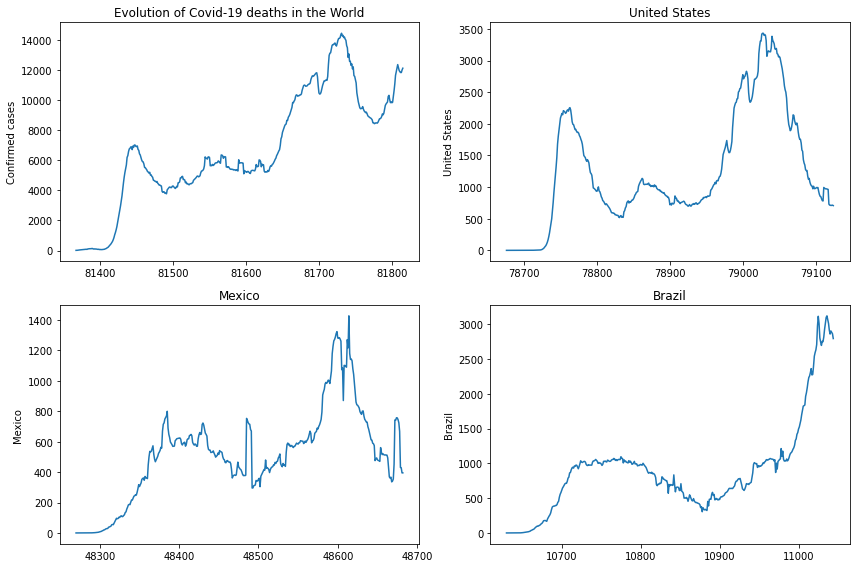

In [60]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(12,8))

# World
df.loc[df.location == "World", "new_deaths_smoothed"].plot(kind="line", ax=ax1)
ax1.set_title("Evolution of Covid-19 deaths in the World")
ax1.set_ylabel("Confirmed cases")

# USA
df.loc[df.location == "United States", "new_deaths_smoothed"].plot(kind="line", ax=ax2)
ax2.set_title("United States")
ax2.set_ylabel("United States")

# Italy
df.loc[df.location == "Mexico", "new_deaths_smoothed"].plot(kind="line", ax=ax3)
ax3.set_title("Mexico")
ax3.set_ylabel("Mexico")

# Brazil
df.loc[df.location == "Brazil", "new_deaths_smoothed"].plot(kind="line", ax=ax4)
ax4.set_title("Brazil")
ax4.set_ylabel("Brazil")


plt.tight_layout()

plt.show()